### Works on Tensorflow-GPU on MAC
source activate tensorflow-gpu

tensorflow version 1.0.0

# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [96]:
import  numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
%matplotlib inline

In [97]:
NUM_LABELS=43
EPOCHS = 300
BATCH_SIZE = 128
CHANNELS=1
KEEP_PROBAB=0.9
BETA=0.7

### Results
Only mean normalization
NUM_LABELS=43
EPOCHS = 600
BATCH_SIZE = 128
CHANNELS=3
KEEP_PROBAB=0.5
Valid Accuracy = 0.921
Test Accuracy = 0.847
Test accuracy lower by ~7%

Only mean normalization
NUM_LABELS=43
EPOCHS = 600
BATCH_SIZE = 128
CHANNELS=3
KEEP_PROBAB=0.3
Valid Accuracy = 0.656
Test Accuracy = 0.627
Test accuracy lower by ~3%

Only mean normalization
NUM_LABELS=43
EPOCHS = 600
BATCH_SIZE = 128
CHANNELS=3
KEEP_PROBAB=0.7
Valid Accuracy = 0.978
Test Accuracy = 0.912
Test accuracy lower by ~6%

Only mean normalization
NUM_LABELS=43
EPOCHS = 600
BATCH_SIZE = 128
CHANNELS=3
KEEP_PROBAB=1.0
Valid Accuracy = 0.988
Test Accuracy = 0.899
Test accuracy lower by ~9%

Only mean normalization
NUM_LABELS=43
EPOCHS = 600
BATCH_SIZE = 128
CHANNELS=3
KEEP_PROBAB=0.9
Valid Accuracy = 0.991
Test Accuracy = 0.92
Test accuracy lower by ~7%

grayscale + mean normalization
NUM_LABELS=43
EPOCHS = 600
BATCH_SIZE = 128
CHANNELS=1 
KEEP_PROBAB=0.9
Valid Accuracy = 0.986
Test Accuracy = 0.90
Test accuracy lower by ~8%

grayscale + mean normalization + opencv normalize
NUM_LABELS=43
EPOCHS = 600
BATCH_SIZE = 128
CHANNELS=1 
KEEP_PROBAB=0.9
Valid Accuracy = 0.989
Test Accuracy = 0.913
Test accuracy lower by ~7%

mean normalization
NUM_LABELS=43
EPOCHS = 300
BATCH_SIZE = 128
CHANNELS=3
KEEP_PROBAB=0.9
Valid Accuracy = 0.984
Test Accuracy = 0.916
Test accuracy lower by ~7%

only opencv normalize
NUM_LABELS=43
EPOCHS = 300
BATCH_SIZE = 128
CHANNELS=3
KEEP_PROBAB=0.9
Valid Accuracy = 0.988
Test Accuracy = 0.918
Test accuracy lower by ~7%

No normalization
NUM_LABELS=43
EPOCHS = 300
BATCH_SIZE = 128
CHANNELS=3
KEEP_PROBAB=0.9
Valid Accuracy = 0.985
Test Accuracy = 0.922
Test accuracy lower by ~6%

only grayscale
NUM_LABELS=43
EPOCHS = 300
BATCH_SIZE = 128
CHANNELS=1
KEEP_PROBAB=0.9
Valid Accuracy = 0.982
Test Accuracy = 0.915
Test accuracy lower by ~7%

only grayscale
NUM_LABELS=43
EPOCHS = 600
BATCH_SIZE = 128
CHANNELS=1
KEEP_PROBAB=0.9
Valid Accuracy = 0.987
Test Accuracy = 0.917
Test accuracy lower by ~7%

only grayscale
NUM_LABELS=43
EPOCHS = 100
BATCH_SIZE = 128
CHANNELS=1
KEEP_PROBAB=0.9
BETA=0.05
Valid = 0.97
Test = 0.909

only grayscale
NUM_LABELS=43
EPOCHS = 300
BATCH_SIZE = 128
CHANNELS=1
KEEP_PROBAB=0.9
BETA=0.7
Valid = 0.948
Test = 0.897


In [98]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
#Didn't find a validation set in the pickled data set
#Generate validation set folds from training data

training_file = './data/train.p'
validation_file= ''
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
#with open(validation_file, mode='rb') as f:
#    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [99]:
X_train, y_train = train['features'], train['labels']
#X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

39


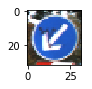

In [100]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
#plt.imshow(image, cmap="gray")
plt.imshow(image)
print(y_train[index])

In [101]:
import cv2
img_n = np.ones(32*32*CHANNELS)

X_train= np.array( [ cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) for img in X_train ] , dtype=np.float32 )
X_test= np.array( [ cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) for img in X_test ] , dtype=np.float32 )

#X_train= np.array( [ cv2.normalize(img,img_n,0,255,cv2.NORM_MINMAX) for img in X_train ] , dtype=np.float32 )
#X_test= np.array( [ cv2.normalize(img,img_n,0,255,cv2.NORM_MINMAX) for img in X_test ] , dtype=np.float32 )

39


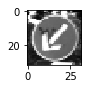

In [102]:
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
#plt.imshow(image)
print(y_train[index])

In [103]:
X_train = X_train.reshape(-1,32,32,CHANNELS)
X_test = X_test.reshape(-1,32,32,CHANNELS)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(39209, 32, 32, 1)
(39209,)
(12630, 32, 32, 1)


In [104]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

#Build Validation set, by randomly picking entries from training set
#Steps: Concatenate features + label data
VALIDATE_SET_PERCENTAGE = 10

training_data_shape = X_train.shape
num_training_samples = training_data_shape[0]
num_features = training_data_shape[1]*training_data_shape[2]*training_data_shape[3]

#We have shuffled the training set, so now pick 30% as the validation set
num_validate = num_training_samples*VALIDATE_SET_PERCENTAGE//100

X_validation = X_train[0:num_validate,:,:,:]
y_validation = y_train[0:num_validate,]

X_train = X_train[num_validate:-1,:,:,:]
y_train = y_train[num_validate:-1]

y_train = y_train.reshape(-1,1)
y_validation = y_validation.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(X_validation.shape)
print(y_validation.shape)
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape) 

(3920, 32, 32, 1)
(3920, 1)
(35288, 32, 32, 1)
(35288, 1)
(12630, 32, 32, 1)
(12630, 1)


In [105]:
#Mean normalization around 0, with stdev of 1
def mean(data):
    return np.mean(data,axis=0)
def stddev(data):
    return np.std(data,axis=0)

#Refer to tensorflow tutorial/cs231n notes on preprocessing
#2. PCA whitening

train_mean = mean(X_train)
train_stddev = stddev(X_train)

#X_train = ((X_train- train_mean)/train_stddev).astype(np.float32)
#X_validation = ((X_validation - train_mean)/train_stddev).astype(np.float32)
#X_test = ((X_test - train_mean)/train_stddev).astype(np.float32)

In [106]:
def one_hot(labels):
    labels = (np.arange(NUM_LABELS) == labels[:,None]).astype(np.float32)
    return labels

y_train = one_hot(y_train).reshape(y_train.shape[0],NUM_LABELS)
y_validation = one_hot(y_validation).reshape(y_validation.shape[0],NUM_LABELS)
y_test = one_hot(y_test).reshape(y_test.shape[0],NUM_LABELS)

print(y_train.shape)
print(y_validation.shape)
print(y_test.shape)

(35288, 43)
(3920, 43)
(12630, 43)


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


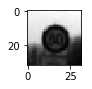

In [107]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
#plt.imshow(image)
print(np.argmax(y_train[index]))
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [108]:
import tensorflow as tf

print('tensor flow version:' + tf.__version__)


tensor flow version:1.0.0


## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [109]:
from tensorflow.contrib.layers import flatten

def LeNet(x,channels=1,keep_probab=1.0):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, channels, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.dropout(tf.nn.relu(conv1),keep_probab)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.dropout(tf.nn.relu(conv2),keep_probab)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.dropout(tf.nn.relu(fc1),keep_probab)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.dropout(tf.nn.relu(fc2),keep_probab)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = NUM_LABELS.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, NUM_LABELS), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(NUM_LABELS))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    weights = [ conv1_W,conv1_b,conv2_W,conv2_b,fc1_W,fc1_b,fc2_W,fc2_b,fc3_W,fc3_b]
    return logits,weights

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [110]:
x = tf.placeholder(tf.float32, (None, 32, 32, CHANNELS))
y = tf.placeholder(tf.int32, (None,NUM_LABELS))
#one_hot_y = tf.one_hot(y, NUM_LABELS)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [111]:
rate = 0.0001

logits,weights = LeNet(x,CHANNELS,KEEP_PROBAB)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss_operation = tf.reduce_mean(cross_entropy) + BETA*( tf.reduce_mean( [ tf.nn.l2_loss(w) for w in weights]) )
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [112]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [113]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.136

EPOCH 2 ...
Validation Accuracy = 0.255

EPOCH 3 ...
Validation Accuracy = 0.366

EPOCH 4 ...
Validation Accuracy = 0.458

EPOCH 5 ...
Validation Accuracy = 0.531

EPOCH 6 ...
Validation Accuracy = 0.597

EPOCH 7 ...
Validation Accuracy = 0.651

EPOCH 8 ...
Validation Accuracy = 0.698

EPOCH 9 ...
Validation Accuracy = 0.740

EPOCH 10 ...
Validation Accuracy = 0.763

EPOCH 11 ...
Validation Accuracy = 0.771

EPOCH 12 ...
Validation Accuracy = 0.797

EPOCH 13 ...
Validation Accuracy = 0.822

EPOCH 14 ...
Validation Accuracy = 0.830

EPOCH 15 ...
Validation Accuracy = 0.841

EPOCH 16 ...
Validation Accuracy = 0.846

EPOCH 17 ...
Validation Accuracy = 0.854

EPOCH 18 ...
Validation Accuracy = 0.864

EPOCH 19 ...
Validation Accuracy = 0.864

EPOCH 20 ...
Validation Accuracy = 0.882

EPOCH 21 ...
Validation Accuracy = 0.883

EPOCH 22 ...
Validation Accuracy = 0.882

EPOCH 23 ...
Validation Accuracy = 0.896

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [114]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    sess.close()

Test Accuracy = 0.897
